In [1]:
import pandas as pd 
import os

In [2]:
os.getcwd()


'C:\\Users\\SerBeld\\Desktop\\kc_house_data.csv'

In [3]:
base = pd.read_csv('kc_house_data.csv')

In [4]:
x= base.iloc[:,5:6].values
y= base.iloc[:,2:3].values

In [5]:
x

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [6]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [7]:
x.shape #Visualizar estrucutra de datos como quedo compuestoand

(21613, 1)

In [8]:
y.shape

(21613, 1)

In [9]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
x = scalerX.fit_transform(x)
scalerY = StandardScaler()
y = scalerY.fit_transform(y)

In [10]:
x

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [11]:
y

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

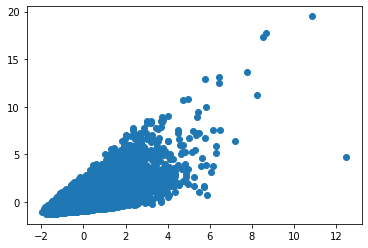

In [12]:
#Graficar
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)

In [13]:
import numpy as np

In [14]:
np.random.seed(1)
np.random.rand(2)

array([0.417022  , 0.72032449])

In [15]:
import tensorflow as tf

In [16]:
bo = tf.Variable(0.417022)
b1 = tf.Variable(0.72032449)

In [17]:
batch_size = 32 #Tomamos 32 filas de la basedata
xph = tf.placeholder(tf.float32, [batch_size,1])
yph = tf.placeholder(tf.float32, [batch_size,1])

In [18]:
y_modelo = bo +b1*xph

In [19]:
error = tf.losses.mean_squared_error(yph, y_modelo)

W1114 09:39:10.948749  8392 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
optimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
entrenamiento = optimizador.minimize(error)
init = tf.global_variables_initializer ()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    for i in range (10):
        indices = np.random.randint(len(x), size = batch_size)
        feed = {xph:x[indices],yph:y[indices]}
        sess.run(entrenamiento, feed_dict = feed)
    bo_final , b1_final = sess.run([bo,b1])

In [22]:
bo_final

0.4109995

In [23]:
b1_final

0.72368014

In [24]:
prevision = bo_final * b1_final*x

In [25]:
prevision

array([[-0.29143447],
       [ 0.15872003],
       [-0.42421385],
       ...,
       [-0.34325082],
       [-0.15541656],
       [-0.34325082]])

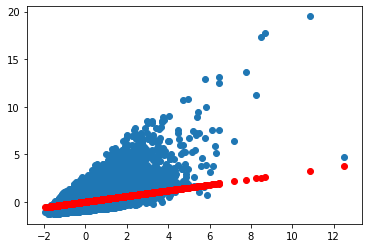

In [26]:
plt.scatter(x,y)
plt.scatter(x,prevision,color = 'red')

In [27]:
#Retomando a escala original de los datos
y1 = scalerY.inverse_transform(y) 
previsiones1 = scalerY.inverse_transform(prevision)

In [28]:
previsiones1

array([[433097.09692521],
       [598357.23239972],
       [384351.30156942],
       ...,
       [414074.34751807],
       [483031.81411895],
       [414074.34751807]])

In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
mae = mean_absolute_error(y1,previsiones1)

In [31]:
mae

186292.02949657282